# Eksploracja Danych - projekt

Dataset : https://www.kaggle.com/datasets/joebeachcapital/banana-index

Dodatkowe dane: https://agribalyse.ademe.fr/app

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
drive.mount('/content/drive')

!ls "/content/drive/My Drive/ED_projekt"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
bananaindex.csv  custom_products.csv


# Analiza datasetu

In [ ]:
df = pd.read_csv(r"/content/drive/My Drive/ED_projekt/bananaindex.csv")

df.head(10)


,entity,year,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,Land use per 100 grams of protein,Land use per 100 grams of fat,Bananas index (kg),Bananas index (1000 kcalories),Bananas index (100g protein),Chart?,type,Banana values,Unnamed: 16
0,Ale,2022,0.488690,0.317338,0.878525,2.424209,0.811485,0.601152,1.577687,3.065766,0.559558,0.362340,0.113771,True,1,Per KG,0.873350
1,Almond butter,2022,0.387011,0.067265,0.207599,0.079103,7.683045,1.296870,3.608433,1.495297,0.443134,0.076804,0.026885,True,1,Per 1000 kcalories,0.875803
2,Almond milk,2022,0.655888,2.222230,13.595512,4.057470,1.370106,2.675063,12.687839,4.600530,0.751002,2.537364,1.760651,True,1,Per 100g protein,7.721869
3,Almonds,2022,0.602368,0.105029,0.328335,0.119361,8.230927,1.423376,4.261040,1.610136,0.689721,0.119923,0.042520,True,1,NaN,NaN
4,Apple juice,2022,0.458378,0.955184,29.152212,19.754980,0.660629,1.382839,43.232158,26.246743,0.524851,1.090638,3.775280,True,1,NaN,NaN
5,Apple pie,2022,1.244974,0.418182,4.704171,2.585492,1.765165,0.597374,6.471804,3.819800,1.425516,0.477484,0.609201,True,3,NaN,NaN
6,Apples,2022,0.507354,0.898188,13.442716,25.594410,0.668999,1.205081,18.667990,36.386277,0.580929,1.025560,1.740863,True,1,NaN,NaN
7,Asparagus,2022,0.925692,2.791229,3.853152,16.707521,1.401769,3.909719,5.424797,20.964724,1.059933,3.187053,0.498992,True,1,NaN,NaN
8,Avocados,2022,0.921227,1.853708,4.984962,11.067428,1.248931,2.513363,6.758265,15.006285,1.054821,2.116583,0.645564,True,1,NaN,NaN
9,Bacon,2022,19.314209,6.818607,9.157925,11.273881,42.332229,14.792841,18.106127,23.911078,22.115095,7.785553,1.185973,True,2,NaN,NaN


In [ ]:
list(df.columns.values)


['entity',
 'year',
 'emissions_kg',
 'emissions_1000kcal',
 'emissions_100g_protein',
 'emissions_100g_fat',
 'land_use_kg',
 'land_use_1000kcal',
 'Land use per 100 grams of protein',
 'Land use per 100 grams of fat',
 'Bananas index (kg)',
 'Bananas index (1000 kcalories)',
 'Bananas index (100g protein)',
 'Chart?',
 'type',
 'Banana values',
 'Unnamed: 16']

In [ ]:
# wybranie odpowiednich kolumn

df = df[["entity", "emissions_kg", "emissions_1000kcal", "emissions_100g_protein", "emissions_100g_fat", "land_use_kg", "type"]]

# pd.set_option('display.max_rows', None)

In [ ]:
df.head(10)

,entity,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,type
0,Ale,0.488690,0.317338,0.878525,2.424209,0.811485,1
1,Almond butter,0.387011,0.067265,0.207599,0.079103,7.683045,1
2,Almond milk,0.655888,2.222230,13.595512,4.057470,1.370106,1
3,Almonds,0.602368,0.105029,0.328335,0.119361,8.230927,1
4,Apple juice,0.458378,0.955184,29.152212,19.754980,0.660629,1
5,Apple pie,1.244974,0.418182,4.704171,2.585492,1.765165,3
6,Apples,0.507354,0.898188,13.442716,25.594410,0.668999,1
7,Asparagus,0.925692,2.791229,3.853152,16.707521,1.401769,1
8,Avocados,0.921227,1.853708,4.984962,11.067428,1.248931,1
9,Bacon,19.314209,6.818607,9.157925,11.273881,42.332229,2


In [ ]:
# sprawdzenie gdzie brakuje wartosci jakichs

df[df.isna().any(axis=1)]


,entity,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,type
108,Olive oil,5.184628,0.591959,NaN,0.523292,21.707958,1
149,Sunflower oil,3.661397,0.424541,NaN,0.375294,19.461267,1


In [ ]:
df = df.fillna(0.0)

<Axes: >

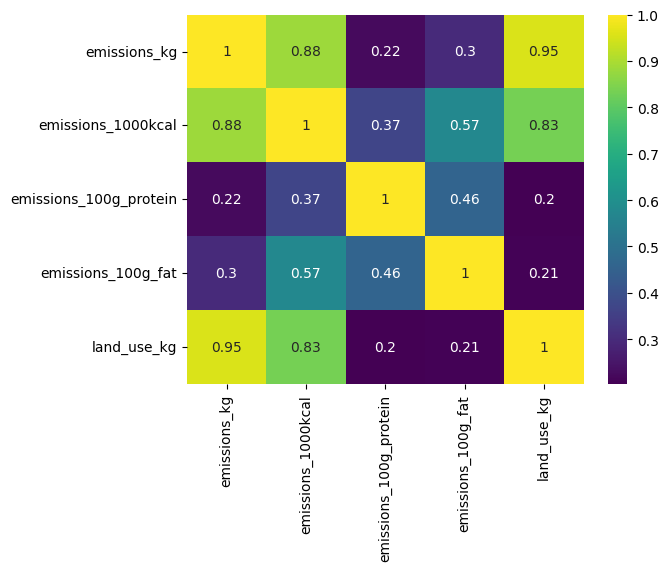

In [ ]:
# macierz korelacji

corr_df  = df[["entity", "emissions_kg", "emissions_1000kcal", "emissions_100g_protein", "emissions_100g_fat", "land_use_kg"]]

corr = corr_df.corr(numeric_only=True) # bez typu
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=corr,
            cmap="viridis")

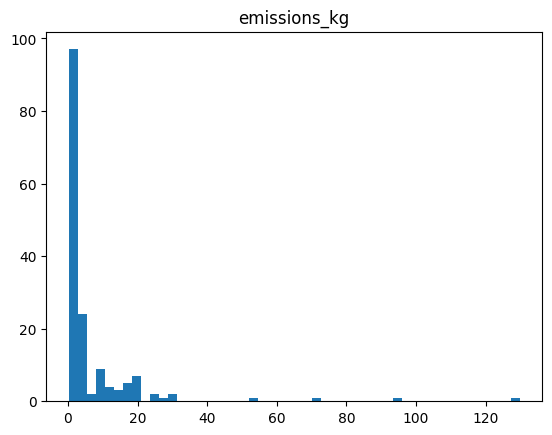

160


In [ ]:
plt.hist(df['emissions_kg'], bins=50)
plt.title('emissions_kg')
plt.show()
print(len(df['emissions_kg']))

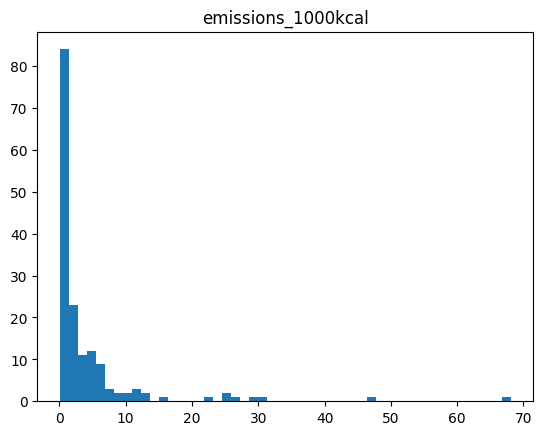

In [ ]:
plt.hist(df['emissions_1000kcal'], bins=50)
plt.title('emissions_1000kcal')
plt.show()

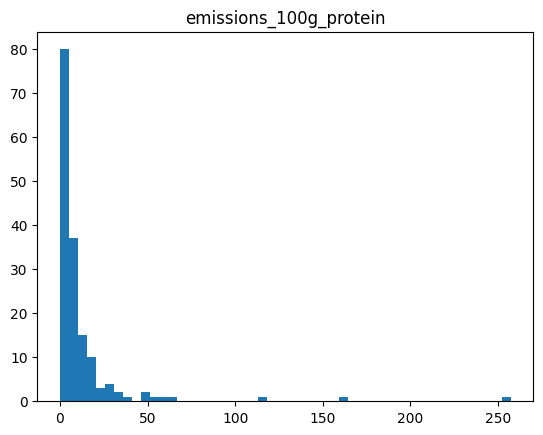

In [ ]:
plt.hist(df['emissions_100g_protein'], bins=50)
plt.title('emissions_100g_protein')
plt.show()

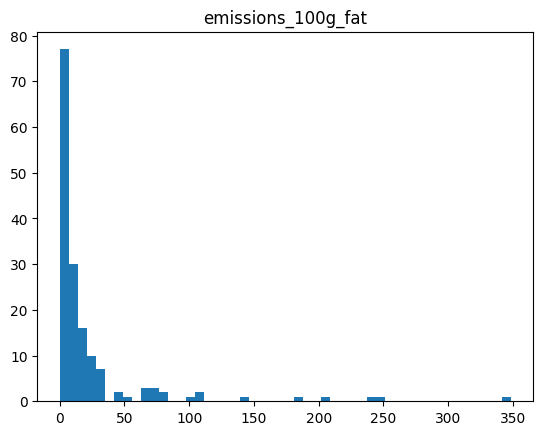

In [ ]:
plt.hist(df['emissions_100g_fat'], bins=50)
plt.title('emissions_100g_fat')
plt.show()

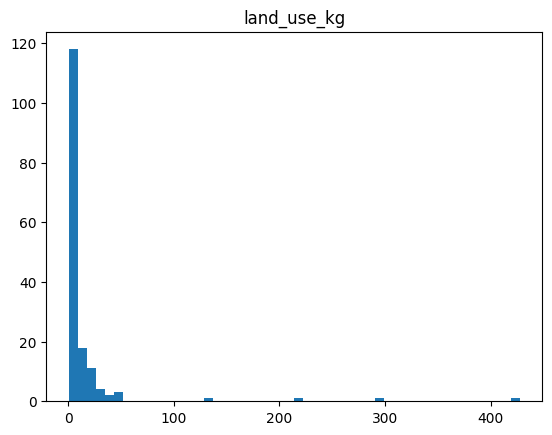

In [ ]:
plt.hist(df['land_use_kg'], bins=50)
plt.title('land_use_kg')
plt.show()

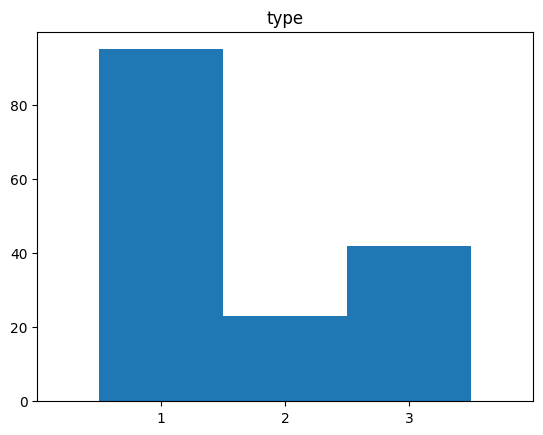

In [ ]:
# plt.hist(df['type'], bins=3)
bins = np.arange(6) - 0.5
plt.hist(df['type'], bins)
plt.xticks(range(1, 4))
plt.xlim([0, 4])
plt.title('type')
# plt.xticks(ticks=[1, 2, 3])
plt.show()

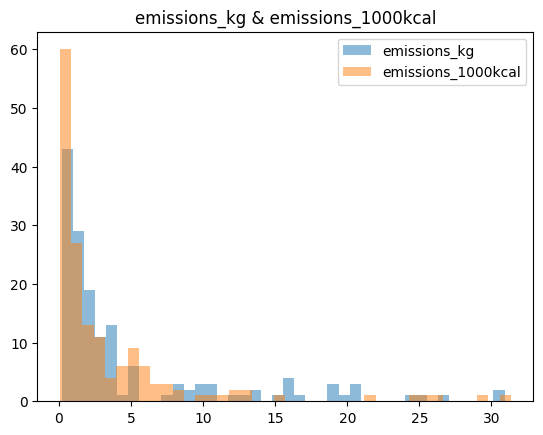

In [ ]:
# ["entity", "emissions_kg", "emissions_1000kcal", "emissions_100g_protein", "emissions_100g_fat", "land_use_kg", "type"]
df2 = df.copy()
emissions_100g_fat = df2.loc[df2['emissions_kg'] <= 40 ]
plt.hist(emissions_100g_fat['emissions_kg'], bins=40, alpha=0.5, label='emissions_kg')

land_use_kg = df2.loc[df2['emissions_1000kcal'] <= 40 ]
plt.hist(land_use_kg['emissions_1000kcal'], bins=40, alpha=0.5, label='emissions_1000kcal')
plt.title('emissions_kg & emissions_1000kcal')
plt.legend()
plt.show()

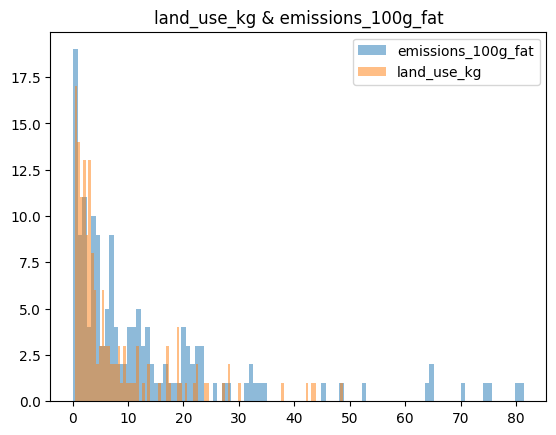

In [ ]:
df2 = df.copy()
emissions_100g_fat = df2.loc[df2['emissions_100g_fat'] <= 100 ]
plt.hist(emissions_100g_fat['emissions_100g_fat'], bins=100, alpha=0.5, label='emissions_100g_fat')

land_use_kg = df2.loc[df2['land_use_kg'] <= 100 ]
plt.hist(land_use_kg['land_use_kg'], bins=100, alpha=0.5, label='land_use_kg')
plt.title('land_use_kg & emissions_100g_fat')
plt.legend()
plt.show()

# Elementy nietypowe



## Metoda 3 sigm po jednowymiarowych przestrzeniach

In [ ]:
def three_sigma(df, column, sigma_count=1, h=1, use_median=False, use_quartils=False):

  dataset = df[column]

  sigma = np.std(dataset) # obliczenie sigmy

  # indeksy elementow nietypowych
  indexes = []

  if use_median and not use_quartils: # jako E uzywana mediana
    sorted = np.sort(dataset)
    sigma = np.std(sorted)
    E_index = int(len(sorted)/2)
    E = sorted[E_index]
    # print(f'Mediana: {E}') # rysowac w kolorze i sparametryzowac legende
  elif not use_quartils: # domyslnie jako E uzywana srednia
    E = np.mean(dataset)
    # print(f'Średnia: {E}')


  # podzial do plotowania
  typical = []
  not_typical =[]

  if use_quartils:
    a = sigma_count/(1.35)

    left = np.quantile(dataset, 0.5) - a *(np.quantile(dataset, 0.75) - np.quantile(dataset, 0.25))
    right = np.quantile(dataset, 0.5) + a * (np.quantile(dataset, 0.75) - np.quantile(dataset, 0.25))

    for index, row in df.iterrows():
      if row[column] > right or row[column] < left:
        not_typical.append(row[column])
        indexes.append(index)
      else:
        typical.append(row[column])

  else: # mediana lub srednia
    for index, row in df.iterrows():
      if abs(row[column]-E) > sigma * sigma_count:
        not_typical.append(row[column])
        indexes.append(index)
      else:
        typical.append(row[column])


  # ## plotowanie punktow
  plt.figure(figsize=(20, 5), dpi=80)
  plt.plot(typical, np.zeros(len(typical)), marker='|', color='b', ms=40)


  plt.grid()
  plt.ylim((-0.1, 0.1))

  plt.title(f'{column}')
  plt.xlabel(column)

  nietypowy_frame = df.iloc[indexes]
  nietypowy_frame = nietypowy_frame.sort_values(by=column, ascending=False)
  maxval = nietypowy_frame.iloc[0][column]

  last_one = 0.0
  position = 0.0

  y = 0.012
  for index, row in nietypowy_frame.iterrows():
    elem = row
    # elem = df.iloc[index]
    val = elem[column]
    pos = val
    if y>0:
      y = -y - 0.007
    else:
      y = -y + 0.007
    plt.plot(val, 0, marker='x', color='r', ms=10)


    plt.annotate(
      elem['entity'],
      xy=(pos, 0),
      xytext=(pos-0.01*maxval, y),
      arrowprops=dict(arrowstyle="->"),
      fontsize=11,
      bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

  # wylaczenie ytickow bo sa tu mylace
  plt.gca().axes.get_yaxis().set_visible(False)

  plt.show()

  return nietypowy_frame


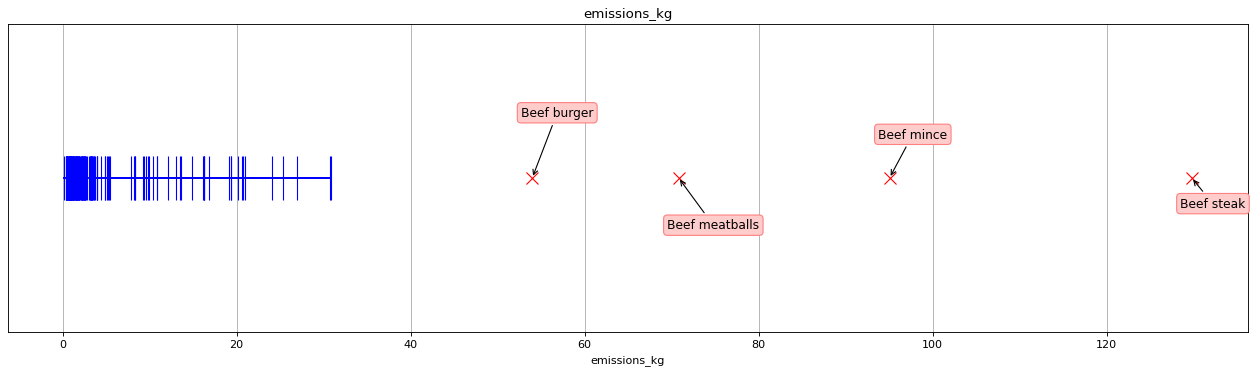

,entity,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,type
18,Beef steak,129.747715,68.095953,64.190391,146.107870,427.331126,2
17,Beef mince,95.034572,47.336598,53.111026,80.581707,295.253544,2
16,Beef meatballs,70.787474,31.338691,35.620428,52.661812,214.995398,2
15,Beef burger,53.976371,21.905134,28.806286,32.719983,135.347117,2


In [ ]:
three_sigma(df, column = 'emissions_kg', sigma_count=3)

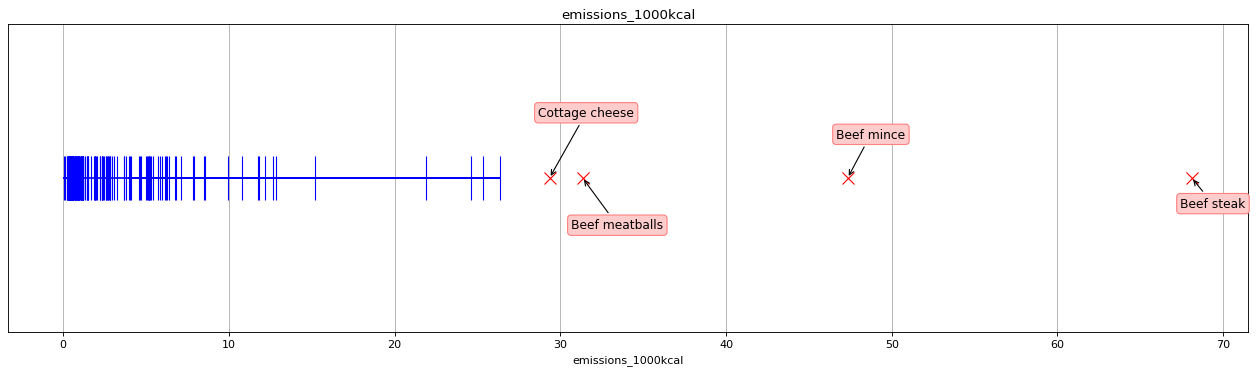

,entity,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,type
18,Beef steak,129.747715,68.095953,64.190391,146.107870,427.331126,2
17,Beef mince,95.034572,47.336598,53.111026,80.581707,295.253544,2
16,Beef meatballs,70.787474,31.338691,35.620428,52.661812,214.995398,2
57,Cottage cheese,25.278503,29.346968,22.337566,244.477973,29.915060,3


In [ ]:
three_sigma(df, column = 'emissions_1000kcal', sigma_count=3)

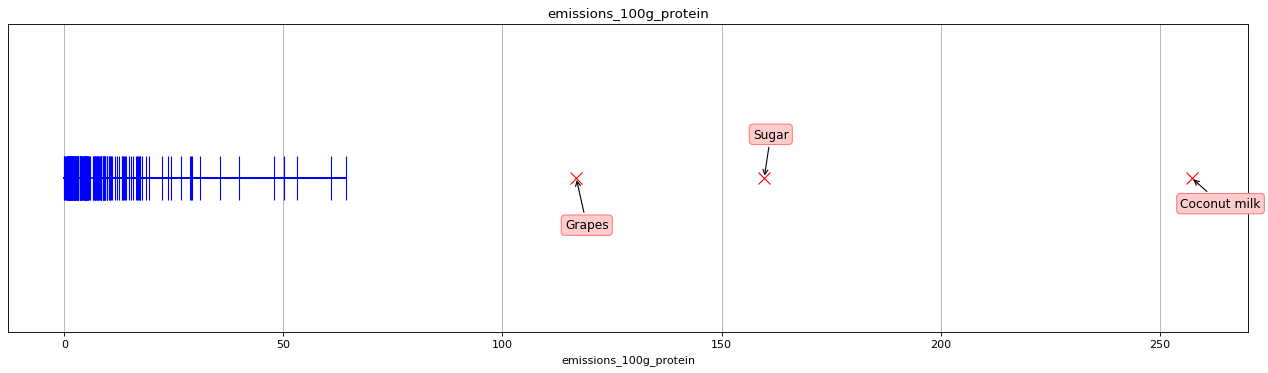

,entity,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,type
52,Coconut milk,3.319990,12.848692,257.293857,28.268731,0.545269,1
148,Sugar,1.851686,0.464977,159.733044,239.244524,2.153669,1
80,Grapes,8.278876,12.671419,116.820455,203.724449,1.536532,1


In [ ]:
three_sigma(df, column = 'emissions_100g_protein', sigma_count=3)

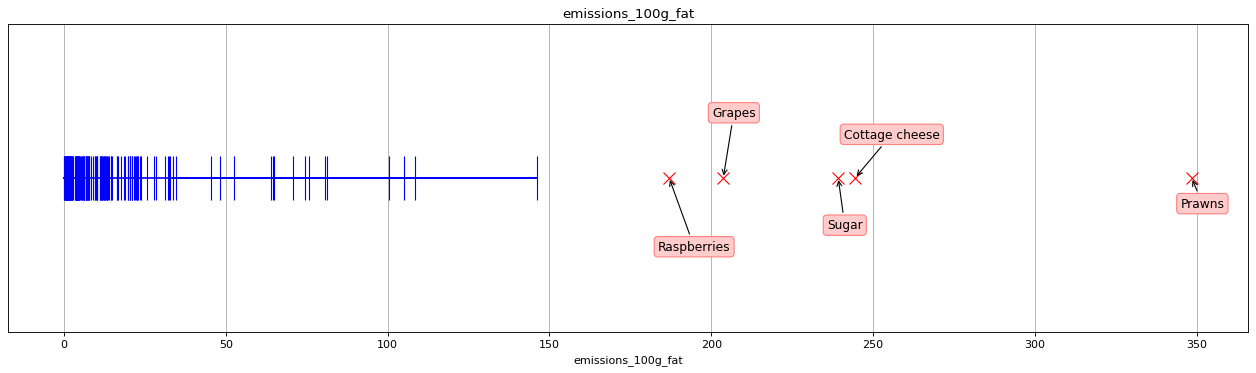

,entity,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,type
130,Prawns,20.911283,26.329290,13.121885,348.489652,1.017165,2
57,Cottage cheese,25.278503,29.346968,22.337566,244.477973,29.915060,3
148,Sugar,1.851686,0.464977,159.733044,239.244524,2.153669,1
80,Grapes,8.278876,12.671419,116.820455,203.724449,1.536532,1
136,Raspberries,8.370972,24.614978,60.839171,186.986093,1.544836,1


In [ ]:
three_sigma(df, column = 'emissions_100g_fat', sigma_count=3)

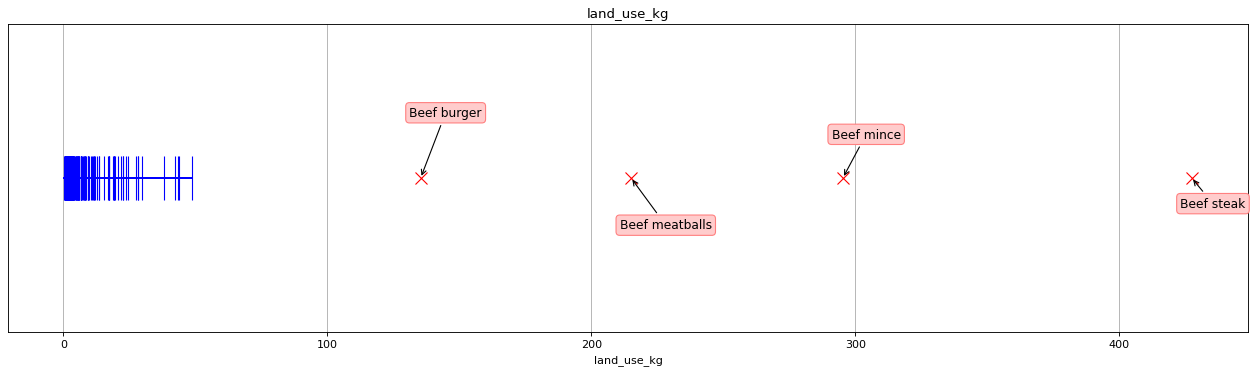

,entity,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,type
18,Beef steak,129.747715,68.095953,64.190391,146.107870,427.331126,2
17,Beef mince,95.034572,47.336598,53.111026,80.581707,295.253544,2
16,Beef meatballs,70.787474,31.338691,35.620428,52.661812,214.995398,2
15,Beef burger,53.976371,21.905134,28.806286,32.719983,135.347117,2


In [ ]:
three_sigma(df, column = 'land_use_kg', sigma_count=2)

## Metoda K-najbliższych sąsiadów dla wszystkich wymiarów

In [ ]:
from sklearn.neighbors import NearestNeighbors

def knn(k, r): # k - ktory sasiad, r - czulosc procedury
  # wszystkie poza entity(nazwa) i type
  columns = [ "emissions_kg", "emissions_1000kcal", "emissions_100g_protein", "emissions_100g_fat", "land_use_kg"]
  m = len(df)

  #normalizacja
  # df2 =(df-df.mean(numeric_only=True))/df.std(numeric_only=True)
  df2 = (df-df.min(numeric_only=True))/(df.max(numeric_only=True)-df.min(numeric_only=True))

  knn = NearestNeighbors(n_neighbors=k+1, algorithm='brute')
  knn.fit(df2[columns])

  distances, indexes = knn.kneighbors(df2[columns])

  k_neighbour_tuple = tuple(zip(distances[:, -1], indexes[:, 0]))
  k_neighbour_tuple = sorted(k_neighbour_tuple, key=lambda x: x[0])

  outliers_number = int(m*r)
  outliers_indexes = [x[1] for x in k_neighbour_tuple[-outliers_number:]]

  outliers = df.iloc[outliers_indexes]
  return outliers

In [ ]:
def plot_outliers(df, outliers, columns):
  ax = sns.scatterplot(data=df, x=columns[0], y=columns[1])
  ax = sns.scatterplot(data=outliers, x=columns[0], y=columns[1], color='black')

  plt.title('Elementy nietypowe')
  plt.xlabel(columns[0])
  plt.ylabel(columns[1])


  def label_point(x, y, val, ax):
      a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
      for i, point in a.iterrows():
          ax.text(point['x']+.02, point['y'], str(point['val']))

  label_point(outliers[columns[0]], outliers[columns[1]], outliers['entity'], plt.gca())


,entity,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,type
15,Beef burger,53.976371,21.905134,28.806286,32.719983,135.347117,2
57,Cottage cheese,25.278503,29.346968,22.337566,244.477973,29.915060,3
16,Beef meatballs,70.787474,31.338691,35.620428,52.661812,214.995398,2
130,Prawns,20.911283,26.329290,13.121885,348.489652,1.017165,2
17,Beef mince,95.034572,47.336598,53.111026,80.581707,295.253544,2
148,Sugar,1.851686,0.464977,159.733044,239.244524,2.153669,1
52,Coconut milk,3.319990,12.848692,257.293857,28.268731,0.545269,1
18,Beef steak,129.747715,68.095953,64.190391,146.107870,427.331126,2


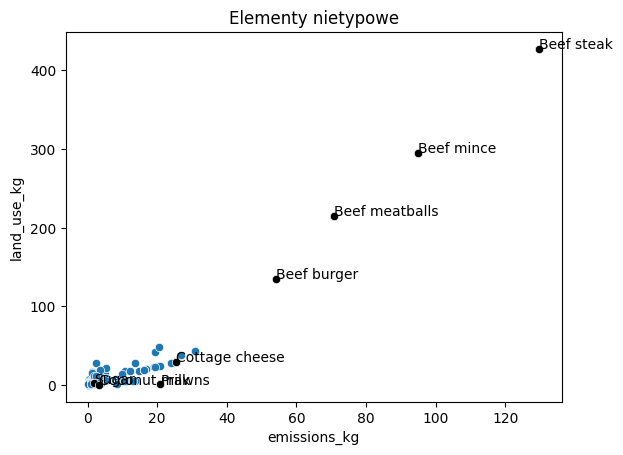

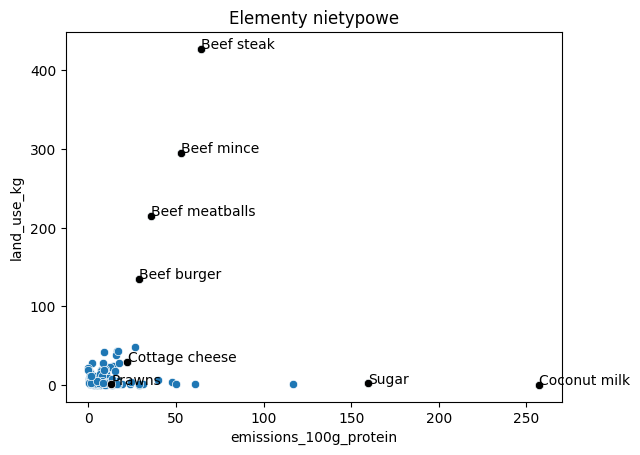

In [ ]:
outliers = knn(2, 0.05) # mozna sie pobawic z k i r

display(outliers)

plot_outliers(df, outliers, ['emissions_kg', 'land_use_kg'])
plt.show()

plot_outliers(df, outliers, ['emissions_100g_protein', 'land_use_kg'])
plt.show()

,entity,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,type
91,Lettuce,4.926023,25.324299,39.949626,64.423953,6.781334,1
15,Beef burger,53.976371,21.905134,28.806286,32.719983,135.347117,2
136,Raspberries,8.370972,24.614978,60.839171,186.986093,1.544836,1
80,Grapes,8.278876,12.671419,116.820455,203.724449,1.536532,1
57,Cottage cheese,25.278503,29.346968,22.337566,244.477973,29.915060,3
16,Beef meatballs,70.787474,31.338691,35.620428,52.661812,214.995398,2
148,Sugar,1.851686,0.464977,159.733044,239.244524,2.153669,1
130,Prawns,20.911283,26.329290,13.121885,348.489652,1.017165,2
52,Coconut milk,3.319990,12.848692,257.293857,28.268731,0.545269,1
17,Beef mince,95.034572,47.336598,53.111026,80.581707,295.253544,2


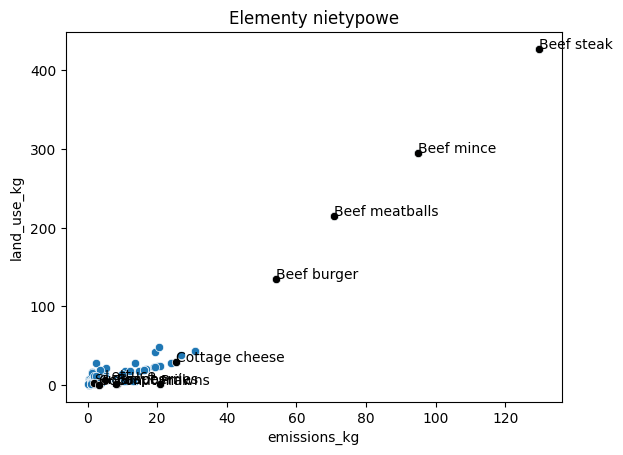

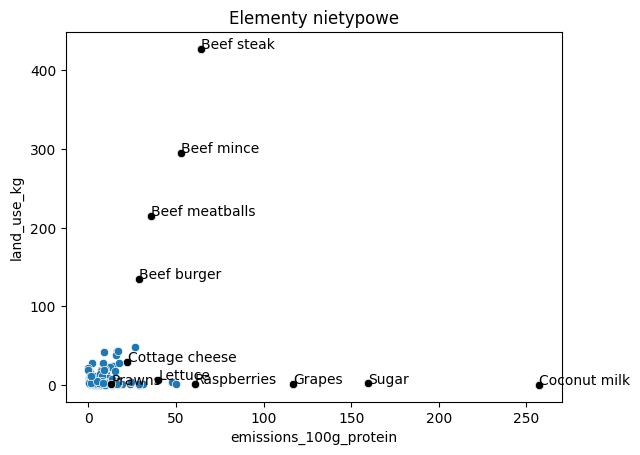

In [ ]:
outliers = knn(4, 0.07) # mozna sie pobawic z k i r

display(outliers)


plot_outliers(df, outliers, ['emissions_kg', 'land_use_kg'])
plt.show()

plot_outliers(df, outliers, ['emissions_100g_protein', 'land_use_kg'])
plt.show()

In [ ]:
outliers.head(15)

,entity,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,type
91,Lettuce,4.926023,25.324299,39.949626,64.423953,6.781334,1
15,Beef burger,53.976371,21.905134,28.806286,32.719983,135.347117,2
136,Raspberries,8.370972,24.614978,60.839171,186.986093,1.544836,1
80,Grapes,8.278876,12.671419,116.820455,203.724449,1.536532,1
57,Cottage cheese,25.278503,29.346968,22.337566,244.477973,29.915060,3
16,Beef meatballs,70.787474,31.338691,35.620428,52.661812,214.995398,2
148,Sugar,1.851686,0.464977,159.733044,239.244524,2.153669,1
130,Prawns,20.911283,26.329290,13.121885,348.489652,1.017165,2
52,Coconut milk,3.319990,12.848692,257.293857,28.268731,0.545269,1
17,Beef mince,95.034572,47.336598,53.111026,80.581707,295.253544,2


## Pozbycie się elementów nietypowych

In [ ]:
# pozbycie się elementow nietypowych
out_indexes = list(outliers.index)
df2 = df.drop(out_indexes)

# Klasteryzacja

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap



In [ ]:
# this will be useful later:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

def hierarchical_clustering(df2, n_clusters=5):
  # klastrowanie
  df_cluster = df2.copy()
  df_cluster = df_cluster[["emissions_kg", "emissions_1000kcal", "emissions_100g_protein", "emissions_100g_fat", "land_use_kg"]]

  scaler = MinMaxScaler()
  scaler.fit(df_cluster)
  df_cluster = scaler.transform(df_cluster)

  hc = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
  hc = hc.fit(df_cluster)

  #plotowanie

  cmap = ListedColormap([
    "mediumvioletred",
    "mediumseagreen",
    "darkorange",
    "darkslateblue",
    "mediumturquoise",
    "olivedrab",
    "firebrick",
    "cornflowerblue",
    "darkolivegreen",
    "lightsalmon"
])

  df_cluster = pd.DataFrame(df_cluster, columns=[ "emissions_kg", "emissions_1000kcal", "emissions_100g_protein", "emissions_100g_fat", "land_use_kg"])


  columns_plot = [ "emissions_kg", "emissions_1000kcal", "emissions_100g_protein", "emissions_100g_fat"]
  fig = plt.figure(figsize=(12, 12))

  for i in range(4):
    indexes = [0, 1, 2, 3]
    indexes.pop(i)

    ax = fig.add_subplot(2, 2, i+1, projection='3d')

    x = df_cluster[columns_plot[indexes[0]]]
    y = df_cluster[columns_plot[indexes[1]]]
    z = df_cluster[columns_plot[indexes[2]]]

    # ax = plt.axes(projection='3d')
    sc = ax.scatter3D(x, y, z, c=hc.labels_, cmap = cmap, marker = 'o')
    # plt.legend(*sc.legend_elements())

    # #title

    # # axes labels
    ax.set_xlabel(columns_plot[indexes[0]])
    ax.set_ylabel(columns_plot[indexes[1]])
    ax.set_zlabel(columns_plot[indexes[2]])
    ax.set_box_aspect(aspect=None, zoom=0.8)

  plt.show()

  df_cluster["cluster"] = hc.labels_

  return df_cluster

In [ ]:
def analyze_clusters(hc, n):
  col_mean = [ "emissions_kg", "emissions_1000kcal", "emissions_100g_protein", "emissions_100g_fat", "land_use_kg"]

  words = []
  for i in range(n):
    clst = hc[hc["cluster"] == i]
    indexes = list(clst.index)
    print(indexes)

    tmp_frame = df2.iloc[indexes]

    print(f'Klaster {i}, {len(indexes)} elementow')
    print("Wartości średnie w klastrze:")
    print(tmp_frame[col_mean].mean(numeric_only=True))
    print()
    print(f'Podział typów:')
    print(f"Rośline (1): { tmp_frame[ tmp_frame['type'] == 1 ].count()['type']}")
    print(f"Zwierzęce (2): { tmp_frame[ tmp_frame['type'] == 2 ].count()['type']}")
    print(f"Przetworzone (3): { tmp_frame[ tmp_frame['type'] == 3 ].count()['type']}")
    print()
    words.append([word.replace(" ", " ") for word in tmp_frame['entity'].tolist()])

    print(words[i])


  return words

# df2.iloc[indexes_cl_0]

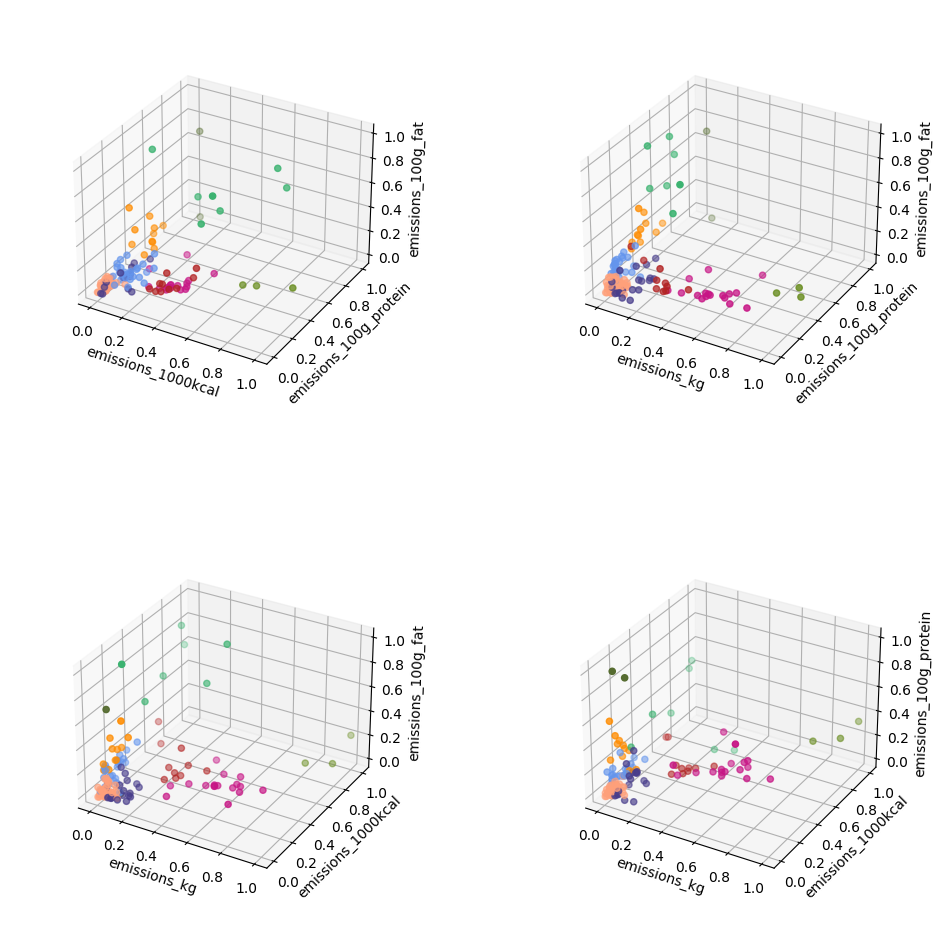

[9, 18, 22, 27, 33, 43, 59, 64, 72, 74, 85, 92, 93, 105, 118, 119, 129]
Klaster 0, 17 elementow
Wartości średnie w klastrze:
emissions_kg              16.835294
emissions_1000kcal         5.372581
emissions_100g_protein    11.164457
emissions_100g_fat         7.350296
land_use_kg               23.739201
dtype: float64

Podział typów:
Rośline (1): 1
Zwierzęce (2): 4
Przetworzone (3): 12

['Bacon', 'Blue cheese', 'Brie', 'Camembert', 'Cheddar cheese', 'Chilli con carne', 'Dark chocolate', 'Feta cheese', 'Goat’s cheese', 'Halloumi cheese', 'Macaroni cheese', 'Milk chocolate', 'Mozzarella cheese', 'Parmesan cheese', 'Pork chops', 'Pork sausages', 'Ricotta cheese']
[16, 35, 49, 137, 142, 143, 145]
Klaster 1, 7 elementow
Wartości średnie w klastrze:
emissions_kg               5.289584
emissions_1000kcal         8.351514
emissions_100g_protein    18.605211
emissions_100g_fat        86.373389
land_use_kg                3.116856
dtype: float64

Podział typów:
Rośline (1): 5
Zwierzęce (2): 2
Prz

In [ ]:
nn = 9
hc = hierarchical_clustering(df2, n_clusters=nn)
cluster_products  = analyze_clusters(hc, nn)

Analiza klastrów dla n = 9:


0.   **MLEKON**: produkty mleczne, bekon oraz produkty wieprzowe - bardzo wysoki land use, gdybyśmy nie wyrzucili z datasetu 4 produktów z 'beef' w nazwie ostatnie 2 produkty miały by sporą szansę tam trafić
     
1.   **Pomidory i ryby** : bardzo chude produkty z niskim land use (wszystkie tutaj czerwone)

2.   **Owoce i ryż**: nieco bardziej kaloryczne, ale mniejszy land use

3.   **Fasole i orzechy** : produkty z znaczną ilością kalorii przy małym zapełnieniu terenu

4.  **Jagnięcina**: jagnięcina

5.  **Kurczaki, ryby i inne** : produkty semi-tłuste o małym wykorzystaniu terenu (mleko i grzyby też tu są)

6.  **Roślinne 1** : mniejsza produkcja C02, przeważają owoce, dużo produktów uznawanych generalnie za bardzo odżywcze pod względem witamin i minerałów

7.  **Smarowidła** : masło i marmolada, mają bardzo mało białka (i oba się smaruje)

8.  **Roślinne 2** : większa produkcja CO2, przewaga produktów zbożowych i przetworzonych, ziemniaki też tu są (ogólnie: produkty ze skrobią)



---



*   Przy zmnieszeniu n do 8, grupy Roślinna 1 i Roślinna 2 są jedną grupą zajmująca 50% datasetu
*   Dla n = 10 grupa Mlekon dzieli się na dwie, jednak bez widocznego podziału na mleczne i mięsne
*   Dla n = 11 grupa Pomidory i ryby dzieli się na dwie, przy czym ketchup jest w grupie z rybami ale nie z pomidorami (2 elementowa)
*   Dla n = 12 grupa Fasole i orzechy rodziela się na 2, przy czym podział jest dość wyraźny - produkty bardziej tłuste i produkty bardziej przetworzone
*   n = 13: Cod i Salmon się wreszcie oddzielają od ketchupu, który zostaje z truskawkami i burakiem
*   n = 14: gorzka czekolada tworzy 1 elementowy klaster
*   n = 15: masło i marmolada rozstają się (kolejne 2 pojedyncze klastry)
*   n = 16: Ryż i rice noodles oddzielają się od owoców
*   n = 17: Ketchup zaczyna karierę solową
*   n = 18: mleko i grzyby tworzą nowy klaster (oryginalnie z kurczakiem i rybami )
*   n = 19: Roślinne 1 dzieli się na 2, gdzie jeden dominują warzywa
*   n = 20: Bacon i chilli con carne wreszcie oddzielają się od produktów mlecznych (ale produkty wieprzowe wciąż tam są)

Cały czas klaster Roślinne 2 jest nieruszony i dominujący(53 elementy)

Wyrzucamy klaster 7(nietypwe) i na jego indeks wejdzie klaster 0 (Mlekon) (głównie by mieć numerację od 1 do 8 bez przerw)




In [ ]:
for i in range(9):
  clst = hc[hc["cluster"] == i]
  indexes = list(clst.index)
  df2.loc[df2.index[indexes], 'cluster'] = i


In [ ]:
# wyrzucenie klastra 7
# df2.drop(df2[df2['cluster'] == 7].index, inplace = True)



In [ ]:
# zmiana klastra 0 na 7
# df2.loc[df2['cluster'] == 0, 'cluster'] = 7


# Klasyfikacja

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

x_set = df2[["emissions_kg", "emissions_1000kcal", "emissions_100g_protein", "emissions_100g_fat", "land_use_kg", "type"]].to_numpy()

y_set = df2[["cluster"]].to_numpy()

train_size = int(0.6 * len(x_set))

x_train = x_set[:train_size,:].astype(float)
x_test = x_set[train_size:,:].astype(float)
y_train = y_set[:train_size,0]
y_test = y_set[train_size:,0]


from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC


model = OneVsOneClassifier(LinearSVC(random_state=12)).fit(x_train, y_train)
predicted = model.predict(x_test)

counter = 0
for test, pred in zip(y_test, predicted):
  if test == pred:
    counter += 1
acc = counter / len(y_test)
print(f'\nAccuracy: {acc}')



Accuracy: 0.8333333333333334


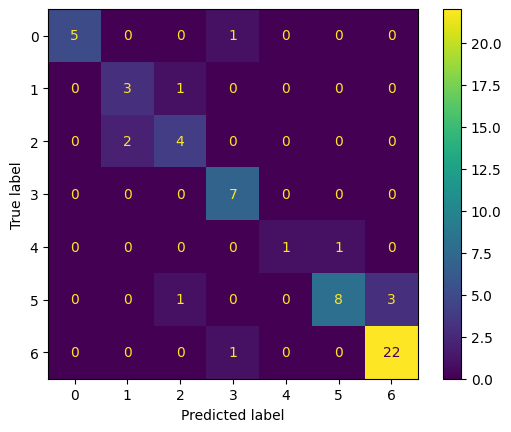

In [ ]:
cm = confusion_matrix(y_test, predicted)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

## Próba z klasyfikacja datasetu wlasnej roboty
 (nie do końca wyszło jak się spodziewaliśmy, ale coś jest)

In [ ]:
nazwy_klastrów = [
    "Pomidory i ryby",
    "Owoce i ryż",
    "Fasole i orzechy",
    "Jagnięcina",
    "Kurczaki, ryby, grzyby",
    "Roślinne",
    "MLEKON",
    "Zbożowe, skrobiowe"
]



In [ ]:
cdf = pd.read_csv(r"/content/drive/My Drive/ED_projekt/custom_products.csv")

cdf.head(25)


,entity,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,type,clstr
0,tomato juice,0.498,2.929412,5.533333,16.600000,1.15,1,1
1,green tomato,0.703,3.056522,5.858333,35.150000,1.68,1,1
2,pizza sauce,0.718,1.329630,3.263636,5.983333,6.38,1,1
3,rice drink,0.372,0.744000,9.300000,3.720000,2.24,1,2
4,rice flour,3.060,0.836066,5.100000,21.857143,7.79,1,2
5,peach,0.596,1.419048,6.622222,19.866667,3.51,1,2
6,mango(imported by boat),0.690,1.150000,8.625000,17.250000,3.21,1,2
7,mango(imported by air),1.060,1.766667,13.250000,26.500000,5.04,1,2
8,white beans,0.556,0.166967,0.241739,6.177778,7.12,1,3
9,green beans,0.413,1.332258,2.294444,20.650000,8.39,1,3


In [ ]:
print("{0:25} {1:35} {2:20}".format("PRODUKT","NASZA PREDYCKJA", "PREDYKCJA MODELU"))


for index, row in cdf.iterrows():
    test = row[["emissions_kg", "emissions_1000kcal", "emissions_100g_protein", "emissions_100g_fat", "land_use_kg", "type"]].to_numpy()
    pred_clstr = model.predict([test])
    # print(f'{row["entity"]} \t {nazwy_klastrów[row["clstr"]-1]} \t {nazwy_klastrów[int(pred_clstr-1)]}')
    print("{0:25} {1:35} {2:20}".format(row["entity"], nazwy_klastrów[row["clstr"]-1], nazwy_klastrów[int(pred_clstr-1)]))



#

PRODUKT                   NASZA PREDYCKJA                     PREDYKCJA MODELU    
tomato juice              Pomidory i ryby                     Roślinne 1 (warzywa i owoce)
green tomato              Pomidory i ryby                     Roślinne 1 (warzywa i owoce)
pizza sauce               Pomidory i ryby                     Roślinne 2 (zbożowe i skrobiowe)
rice drink                Owoce i ryż                         Roślinne 2 (zbożowe i skrobiowe)
rice flour                Owoce i ryż                         Roślinne 2 (zbożowe i skrobiowe)
peach                     Owoce i ryż                         Roślinne 1 (warzywa i owoce)
mango(imported by boat)   Owoce i ryż                         Roślinne 1 (warzywa i owoce)
mango(imported by air)    Owoce i ryż                         Roślinne 1 (warzywa i owoce)
white beans               Fasole i orzechy                    Roślinne 2 (zbożowe i skrobiowe)
green beans               Fasole i orzechy                    Roślinne 2 (zbożowe 

In [ ]:
print(df2.to_string())

                          entity  emissions_kg  emissions_1000kcal  emissions_100g_protein  emissions_100g_fat  land_use_kg  type  cluster
0                            Ale      0.488690            0.317338                0.878525            2.424209     0.811485     1      8.0
1                  Almond butter      0.387011            0.067265                0.207599            0.079103     7.683045     1      8.0
2                    Almond milk      0.655888            2.222230               13.595512            4.057470     1.370106     1      6.0
3                        Almonds      0.602368            0.105029                0.328335            0.119361     8.230927     1      8.0
4                    Apple juice      0.458378            0.955184               29.152212           19.754980     0.660629     1      2.0
5                      Apple pie      1.244974            0.418182                4.704171            2.585492     1.765165     3      8.0
6                         A